In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
# load all csv files into respective dataframes
BTC_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\BTC-USD (3).csv')

AUD_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\AUDUSD=X.csv')
EUR_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\EURUSD=X.csv')
GBP_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\GBPUSD=X.csv')
JPY_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\JPY=X.csv')

SOL_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\SOL-USD.csv')
ETH_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\ETH-USD.csv')
LTC_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\LTC-USD.csv')
DOGE_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\DOGE-USD.csv')

DGS10_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\DGS10 (3).csv')
DTB3_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\DTB3 (1).csv')

USEP_df = pd.read_csv(r'..\\Project_2_BTC_Price_Modeling\csv_files\USEPUINDXD.csv')
GEP_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\GEPUCURRENT.csv')





In [24]:
#Remove High, low, Adj Close and volume column from BTC dataframe

BTC_df = BTC_df.drop(["High","Low","Volume", "Adj Close"], axis=1)

BTC_df.head()


,Date,Open,Close
0,2014-09-15,424.102997,398.821014
1,2014-09-22,399.100006,377.181000
2,2014-09-29,376.928009,320.510010
3,2014-10-06,320.389008,378.549011
4,2014-10-13,377.920990,389.545990


In [25]:
BTC_close_df = BTC_df.drop('Open',axis=1)

<Axes: >

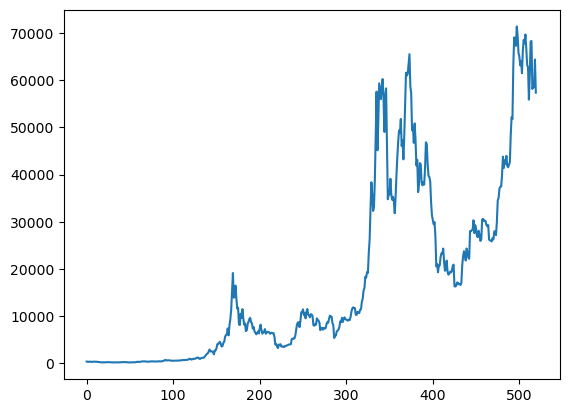

In [26]:
BTC_close_df['Close'].plot(x='Date')

In [27]:
BTC_close_df.columns = ['ds','y']


In [28]:
display(BTC_close_df.shape)
display(BTC_close_df.head(10))
display(BTC_close_df.tail(10))

(522, 2)

,ds,y
0,2014-09-15,398.821014
1,2014-09-22,377.181000
2,2014-09-29,320.510010
3,2014-10-06,378.549011
4,2014-10-13,389.545990
5,2014-10-20,354.704010
6,2014-10-27,325.891998
7,2014-11-03,363.264008
8,2014-11-10,387.881989
9,2014-11-17,367.572998


,ds,y
512,2024-07-08,60787.792969
513,2024-07-15,68154.523438
514,2024-07-22,68255.867188
515,2024-07-29,58116.976563
516,2024-08-05,58719.484375
517,2024-08-12,58483.964844
518,2024-08-19,64333.542969
519,2024-08-26,57325.488281
520,2024-09-02,NaN
521,2024-09-03,59089.375000


In [30]:
#check na values

BTC_close_df.isna().value_counts()

ds     y    
False  False    521
       True       1
Name: count, dtype: int64

In [35]:
#only one, so fill that na value with that date's closing price
BTC_close_df['y'] = BTC_close_df['y'].fillna(59112.480000)
display(BTC_close_df.tail(10))


,ds,y
512,2024-07-08,60787.792969
513,2024-07-15,68154.523438
514,2024-07-22,68255.867188
515,2024-07-29,58116.976563
516,2024-08-05,58719.484375
517,2024-08-12,58483.964844
518,2024-08-19,64333.542969
519,2024-08-26,57325.488281
520,2024-09-02,59112.480000
521,2024-09-03,59089.375000


<Axes: >

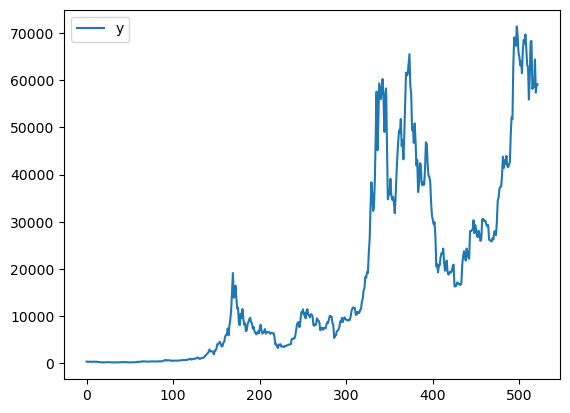

In [36]:
BTC_close_df.plot()

In [40]:
#Instantiate a Prophet model

model = Prophet()
model

In [41]:
#Fit the prophet model to BTC_close_df

model.fit(BTC_close_df)

16:17:55 - cmdstanpy - INFO - Chain [1] start processing
16:17:55 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as  52 weeeks (1 year)
future_trends = model.make_future_dataframe(periods=52, freq="W")

# View the last five rows of the predictions
future_trends.tail()

,ds
569,2025-08-03
570,2025-08-10
571,2025-08-17
572,2025-08-24
573,2025-08-31


In [44]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-15,1020.042639,-21586.638841,6752.761436,1020.042639,1020.042639,-7912.013423,-7912.013423,-7912.013423,-4900.08814,-4900.08814,-4900.08814,-3011.925282,-3011.925282,-3011.925282,0.0,0.0,0.0,-6891.970783
1,2014-09-22,1079.175706,-20012.071850,6155.264462,1079.175706,1079.175706,-7917.395303,-7917.395303,-7917.395303,-4900.08814,-4900.08814,-4900.08814,-3017.307162,-3017.307162,-3017.307162,0.0,0.0,0.0,-6838.219596
2,2014-09-29,1138.308774,-19270.060720,7124.722178,1138.308774,1138.308774,-7544.547011,-7544.547011,-7544.547011,-4900.08814,-4900.08814,-4900.08814,-2644.458870,-2644.458870,-2644.458870,0.0,0.0,0.0,-6406.238237
3,2014-10-06,1197.441841,-18788.478466,7396.437254,1197.441841,1197.441841,-6895.546412,-6895.546412,-6895.546412,-4900.08814,-4900.08814,-4900.08814,-1995.458272,-1995.458272,-1995.458272,0.0,0.0,0.0,-5698.104571
4,2014-10-13,1256.574908,-18830.150049,8943.900448,1256.574908,1256.574908,-6119.917649,-6119.917649,-6119.917649,-4900.08814,-4900.08814,-4900.08814,-1219.829509,-1219.829509,-1219.829509,0.0,0.0,0.0,-4863.342741


c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


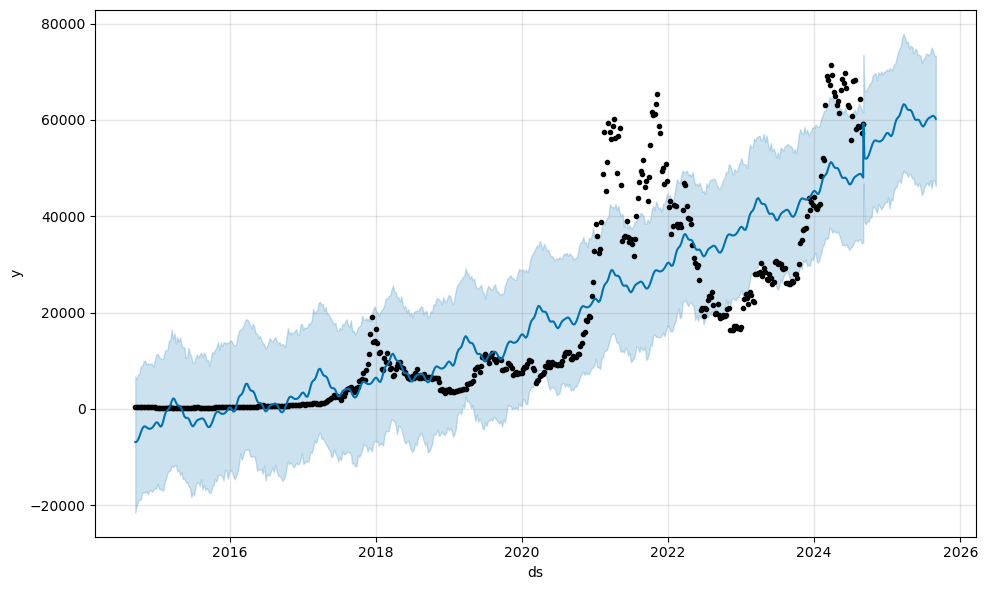

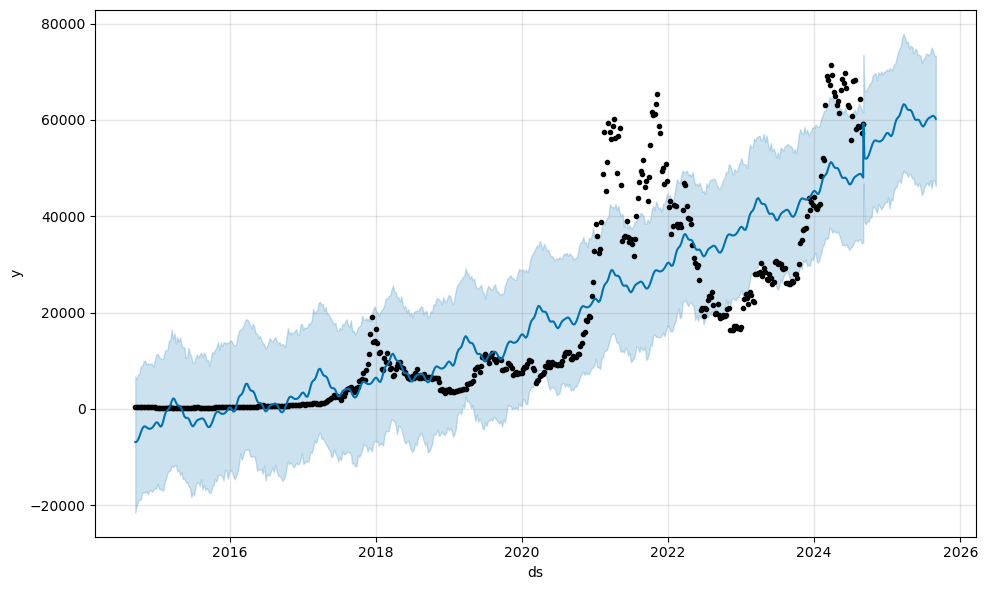

In [45]:
model.plot(forecast_trends)

c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

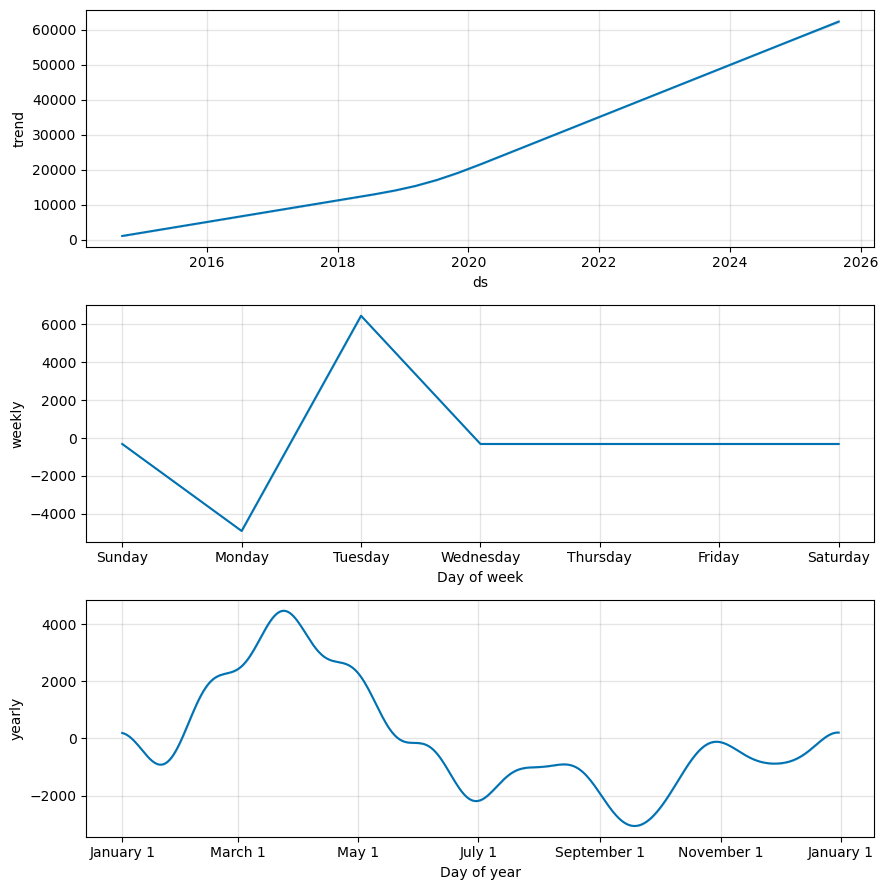

In [46]:
figures = model.plot_components(forecast_trends)

In [47]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(["ds"])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2014-09-15,1020.042639,-21586.638841,6752.761436,1020.042639,1020.042639,-7912.013423,-7912.013423,-7912.013423,-4900.08814,-4900.08814,-4900.08814,-3011.925282,-3011.925282,-3011.925282,0.0,0.0,0.0,-6891.970783
2014-09-22,1079.175706,-20012.071850,6155.264462,1079.175706,1079.175706,-7917.395303,-7917.395303,-7917.395303,-4900.08814,-4900.08814,-4900.08814,-3017.307162,-3017.307162,-3017.307162,0.0,0.0,0.0,-6838.219596
2014-09-29,1138.308774,-19270.060720,7124.722178,1138.308774,1138.308774,-7544.547011,-7544.547011,-7544.547011,-4900.08814,-4900.08814,-4900.08814,-2644.458870,-2644.458870,-2644.458870,0.0,0.0,0.0,-6406.238237
2014-10-06,1197.441841,-18788.478466,7396.437254,1197.441841,1197.441841,-6895.546412,-6895.546412,-6895.546412,-4900.08814,-4900.08814,-4900.08814,-1995.458272,-1995.458272,-1995.458272,0.0,0.0,0.0,-5698.104571
2014-10-13,1256.574908,-18830.150049,8943.900448,1256.574908,1256.574908,-6119.917649,-6119.917649,-6119.917649,-4900.08814,-4900.08814,-4900.08814,-1219.829509,-1219.829509,-1219.829509,0.0,0.0,0.0,-4863.342741


<Axes: xlabel='ds'>

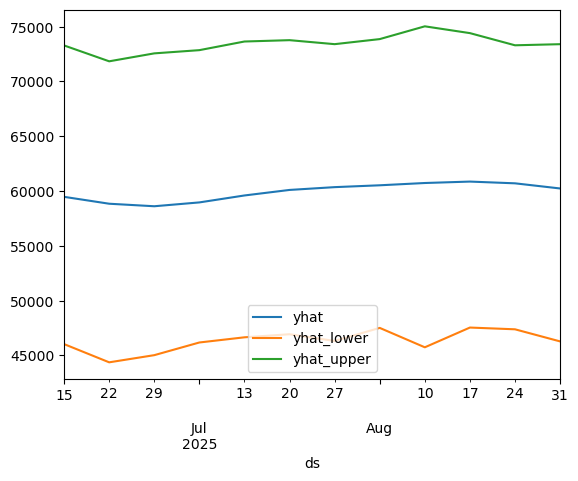

In [48]:
# From the `forecast_trends` DataFrame, plot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 12 weeks  
forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-12:, :].plot()

In [49]:
forecast_Nov_2024 = forecast_trends.loc["2024-11-01":"2024-11-30"][["yhat_upper", "yhat_lower", "yhat"]]

# Replace the column names to something less technical sounding
forecast_Nov_2024 = forecast_Nov_2024.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case", 
        "yhat": "Most Likely Case"
    }
)

# Review the last five rows of the DataFrame
forecast_Nov_2024.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2024-11-03,69720.396478,41378.120725,55762.573429
2024-11-10,68233.192862,40736.510070,55637.693703
2024-11-17,69934.221640,42498.795433,55510.837069
2024-11-24,69346.405391,42103.231563,55510.879765


In [50]:
forecast_Nov_2024.mean()

Best Case           69308.554093
Worst Case          41679.164448
Most Likely Case    55605.495991
dtype: float64

In [52]:
#Create a return rate column, and another column that encodes for positive (1) and negative returns (0) rename to specify BTC data
BTC_df['Close'] = BTC_df['Close'].fillna(59112.480000)
BTC_df['Open'] = BTC_df['Open'].fillna(57326.970000)

BTC_df['BTC Return Rate'] = (BTC_df['Close'] - BTC_df['Open']) / BTC_df['Open']

BTC_df['BTC Return Class'] = BTC_df['BTC Return Rate'].apply(lambda x: 1 if x > 0 else 0)

#convert date column to date time
BTC_df['Date'] = pd.to_datetime(BTC_df['Date'])



#rename to specify BTC data

BTC_rename_df = BTC_df.rename(columns={'Open':'BTC Open','Close':'BTC Close'})

BTC_rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              522 non-null    datetime64[ns]
 1   BTC Open          522 non-null    float64       
 2   BTC Close         522 non-null    float64       
 3   BTC Return Rate   522 non-null    float64       
 4   BTC Return Class  522 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 20.5 KB


In [5]:
#Drop unecessary rows from forex data

AUD_clean_df = AUD_df.drop(["High","Low","Volume", "Adj Close"], axis=1)
EUR_clean_df = EUR_df.drop(["High","Low","Volume", "Adj Close"], axis=1)
GBP_clean_df = GBP_df.drop(["High","Low","Volume", "Adj Close"], axis=1)
JPY_clean_df = JPY_df.drop(["High","Low","Volume", "Adj Close"], axis=1)



In [6]:

#Create return rate columns for FOREX, rename columns to specify currency, and set date column to date time.

AUD_clean_df['AUD Return Rate'] = (AUD_clean_df['Close'] - AUD_clean_df['Open']) /AUD_clean_df['Open']
EUR_clean_df['EUR Return Rate'] = (EUR_clean_df['Close'] - EUR_clean_df['Open']) /EUR_clean_df['Open']
GBP_clean_df['GBP Return Rate'] = (GBP_clean_df['Close'] - GBP_clean_df['Open']) /GBP_clean_df['Open']
JPY_clean_df['JPY Return Rate'] = (JPY_clean_df['Close'] - JPY_clean_df['Open']) /JPY_clean_df['Open']

AUD_rename_df = AUD_clean_df.rename(columns={'Open':'AUD Open','Close':'AUD Close'})
EUR_rename_df = EUR_clean_df.rename(columns={'Open':'EUR Open','Close':'EUR Close'})
GBP_rename_df = GBP_clean_df.rename(columns={'Open':'GBP Open','Close':'GBP Close'})
JPY_rename_df = JPY_clean_df.rename(columns={'Open':'JPY Open','Close':'JPY Close'})

AUD_rename_df['Date'] = pd.to_datetime(AUD_rename_df['Date'])
EUR_rename_df['Date'] = pd.to_datetime(EUR_rename_df['Date'])
GBP_rename_df['Date'] = pd.to_datetime(GBP_rename_df['Date'])
JPY_rename_df['Date'] = pd.to_datetime(JPY_rename_df['Date'])



In [54]:
#Combine treasury bills dataframe, and divide by 100 to reduce to decimals instead of percentages
combined_treasuries_df = DGS10_df.merge(DTB3_df, on='Date',how='outer')
combined_treasuries_df['Date'] = pd.to_datetime(combined_treasuries_df['Date'])
combined_treasuries_df['DGS10'] = combined_treasuries_df['DGS10']/100
combined_treasuries_df['DTB3'] = combined_treasuries_df['DTB3']/100




In [8]:
#Merge FOREX data frames

combined_currency_ex_df = AUD_rename_df.merge(EUR_rename_df, on='Date', how='outer').merge(GBP_rename_df, on='Date', how='outer').merge(JPY_rename_df, on='Date', how='outer')
clean_currency_df = combined_currency_ex_df.drop(['AUD Open','AUD Close','EUR Open','EUR Close','GBP Open','GBP Close','JPY Open','JPY Close'], axis=1)
clean_currency_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             522 non-null    datetime64[ns]
 1   AUD Return Rate  522 non-null    float64       
 2   EUR Return Rate  522 non-null    float64       
 3   GBP Return Rate  522 non-null    float64       
 4   JPY Return Rate  522 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 20.5 KB


In [11]:
#Rename, and set datetime type to Uncertainty index

USEP_df['DATE'] = pd.to_datetime(USEP_df['DATE'])
uncertainty_rename_df = USEP_df.rename(columns={"DATE":'Date'})

uncertainty_rename_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        521 non-null    datetime64[ns]
 1   USEPUINDXD  521 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


In [56]:
#combine BTC, Treasuries', Uncertainty, and FOREX dataframes

combo_df = BTC_rename_df.merge(uncertainty_rename_df, on='Date',how='outer').merge(clean_currency_df, on='Date',how='outer').merge(combined_treasuries_df, on='Date',how='outer')
combo_df

,Date,BTC Open,BTC Close,BTC Return Rate,BTC Return Class,USEPUINDXD,AUD Return Rate,EUR Return Rate,GBP Return Rate,JPY Return Rate,DGS10,DTB3
0,2014-09-15,424.102997,398.821014,-0.059613,0,67.894286,-0.008401,-0.009513,0.002935,0.014963,0.02560,0.000200
1,2014-09-22,399.100006,377.181000,-0.054921,0,58.347143,-0.021095,-0.013028,-0.004434,0.004966,0.02602,0.000180
2,2014-09-29,376.928009,320.510010,-0.149678,0,55.678571,-0.009177,-0.013135,-0.017430,0.003994,0.02534,0.000140
3,2014-10-06,320.389008,378.549011,0.181529,1,72.465714,-0.000260,0.010701,0.008160,-0.022910,0.02452,0.000160
4,2014-10-13,377.920990,389.545990,0.030760,1,59.967143,0.009461,0.008298,-0.000048,-0.001947,0.02340,0.000125
...,...,...,...,...,...,...,...,...,...,...,...,...
517,2024-08-12,58719.394531,58483.964844,-0.004009,0,112.300000,0.015559,0.011224,0.015302,0.004067,0.03938,0.050860
518,2024-08-19,58480.710938,64333.542969,0.100081,1,166.675714,0.018436,0.016737,0.020903,-0.024372,0.03870,0.050720
519,2024-08-26,64342.226563,57325.488281,-0.109053,0,74.302857,-0.003213,-0.011260,-0.006263,0.015069,0.03820,0.050180
520,2024-09-02,57326.970000,59112.480000,0.031146,1,81.178333,0.000000,0.000000,-0.000171,0.000000,NaN,NaN
